

Umsatz in Abhängigkeit der Ferien pro Bundesland

Daten zusammenführen


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Daten einlesen und zusammenführen
df1 = pd.read_csv('/workspaces/Data-Science-und-ML-Team-9/umsatzdaten_gekuerzt.csv')
df2 = pd.read_csv('/workspaces/Data-Science-und-ML-Team-9/Feier_Bruecke_Ferien_bis2018.csv')

df = df1.merge(df2, on='Datum', how='left')

#Datum in Datetime umwandeln
df['Datum'] = pd.to_datetime(df['Datum'])

# Erste Zeilen des Dataframes anzeigen
print(df.head())    

#dataframe in csv speichern
df.to_csv('/workspaces/Data-Science-und-ML-Team-9/umsatzdaten_gekuerzt_mit_feiertagen.csv', index=False)

        id      Datum  Warengruppe      Umsatz  feiertag  brueckentag  BW  BY  \
0  1307011 2013-07-01            1  148.828353         0            0   0   0   
1  1307021 2013-07-02            1  159.793757         0            0   0   0   
2  1307031 2013-07-03            1  111.885594         0            0   0   0   
3  1307041 2013-07-04            1  168.864941         0            0   0   0   
4  1307051 2013-07-05            1  171.280754         0            0   0   0   

   B  BB  ...  HE  MV  NI  NW  RP  SL  SN  ST  SH  TH  
0  1   1  ...   0   1   1   0   0   0   0   0   1   0  
1  1   1  ...   0   1   1   0   0   0   0   0   1   0  
2  1   1  ...   0   1   1   0   0   0   0   0   1   0  
3  1   1  ...   0   1   1   0   0   0   0   0   1   0  
4  1   1  ...   0   1   1   0   0   0   0   0   1   0  

[5 rows x 22 columns]


In [4]:
# Umsätze mit gleichem Datum addieren und das neue DataFrame unabhängig von der Warengruppe machen
df_grouped = df.groupby('Datum').agg({
    'Umsatz': 'sum',
    'feiertag': 'max',
    'brueckentag': 'max',
    'BW': 'max',
    'BY': 'max',
    'B': 'max',
    'BB': 'max',
    'HB': 'max',
    'HH': 'max',
    'HE': 'max',
    'MV': 'max',
    'NI': 'max',
    'NW': 'max',
    'RP': 'max',
    'SL': 'max',
    'SN': 'max',
    'ST': 'max',
    'SH': 'max',
    'TH': 'max'
}).reset_index()


# Erste Zeilen des neuen DataFrames anzeigen
print(df_grouped.head())

#dataframe in csv speichern
df_grouped.to_csv('/workspaces/Data-Science-und-ML-Team-9/umsatzdaten_gekuerzt_mit_feiertagen_grouped.csv', index=False)

       Datum       Umsatz  feiertag  brueckentag  BW  BY  B  BB  HB  HH  HE  \
0 2013-07-01  1269.249107         0            0   0   0  1   1   1   1   0   
1 2013-07-02  1430.008397         0            0   0   0  1   1   1   1   0   
2 2013-07-03  1124.274894         0            0   0   0  1   1   1   1   0   
3 2013-07-04  1184.309567         0            0   0   0  1   1   1   1   0   
4 2013-07-05  1288.023060         0            0   0   0  1   1   1   1   0   

   MV  NI  NW  RP  SL  SN  ST  SH  TH  
0   1   1   0   0   0   0   0   1   0  
1   1   1   0   0   0   0   0   1   0  
2   1   1   0   0   0   0   0   1   0  
3   1   1   0   0   0   0   0   1   0  
4   1   1   0   0   0   0   0   1   0  


Daten extrahieren und Berechnungen durchführen

In [5]:
#Filtern der Daten nach Ferien und Schule je Bundesland
# Baden-Württemberg (BW)
BW_ferien = df_grouped[df_grouped['BW'] == 1]['Umsatz']
BW_schule = df_grouped[df_grouped['BW'] == 0]['Umsatz']
# Bayern (BY)
BY_ferien = df_grouped[df_grouped['BY'] == 1]['Umsatz']
BY_schule = df_grouped[df_grouped['BY'] == 0]['Umsatz']
# Berlin (B)
B_ferien = df_grouped[df_grouped['B'] == 1]['Umsatz']
B_schule = df_grouped[df_grouped['B'] == 0]['Umsatz']
# Brandenburg (BB)
BB_ferien = df_grouped[df_grouped['BB'] == 1]['Umsatz']
BB_schule = df_grouped[df_grouped['BB'] == 0]['Umsatz']
# Bremen (HB)
HB_ferien = df_grouped[df_grouped['HB'] == 1]['Umsatz']
HB_schule = df_grouped[df_grouped['HB'] == 0]['Umsatz']
# Hamburg (HH)
HH_ferien = df_grouped[df_grouped['HH'] == 1]['Umsatz']
HH_schule = df_grouped[df_grouped['HH'] == 0]['Umsatz']
# Hessen (HE)
HE_ferien = df_grouped[df_grouped['HE'] == 1]['Umsatz']
HE_schule = df_grouped[df_grouped['HE'] == 0]['Umsatz']
# Mecklenburg-Vorpommern (MV)
MV_ferien = df_grouped[df_grouped['MV'] == 1]['Umsatz']
MV_schule = df_grouped[df_grouped['MV'] == 0]['Umsatz']
# Niedersachsen (NI)
NI_ferien = df_grouped[df_grouped['NI'] == 1]['Umsatz']
NI_schule = df_grouped[df_grouped['NI'] == 0]['Umsatz']
# Nordrhein-Westfalen (NW)
NW_ferien = df_grouped[df_grouped['NW'] == 1]['Umsatz']
NW_schule = df_grouped[df_grouped['NW'] == 0]['Umsatz']
# Rheinland-Pfalz (RP)
RP_ferien = df_grouped[df_grouped['RP'] == 1]['Umsatz']
RP_schule = df_grouped[df_grouped['RP'] == 0]['Umsatz']
# Saarland (SL)
SL_ferien = df_grouped[df_grouped['SL'] == 1]['Umsatz']
SL_schule = df_grouped[df_grouped['SL'] == 0]['Umsatz']
# Sachsen (SN)
SN_ferien = df_grouped[df_grouped['SN'] == 1]['Umsatz']
SN_schule = df_grouped[df_grouped['SN'] == 0]['Umsatz']
# Sachsen-Anhalt (ST)
ST_ferien = df_grouped[df_grouped['ST'] == 1]['Umsatz']
ST_schule = df_grouped[df_grouped['ST'] == 0]['Umsatz']
# Schleswig-Holstein (SH)
SH_ferien = df_grouped[df_grouped['SH'] == 1]['Umsatz']
SH_schule = df_grouped[df_grouped['SH'] == 0]['Umsatz']
# Thüringen (TH)
TH_ferien = df_grouped[df_grouped['TH'] == 1]['Umsatz']
TH_schule = df_grouped[df_grouped['TH'] == 0]['Umsatz']


#Mittelwert und Standardabweichung und Anzahl berechnen
#Baden-Württemberg (BW)
mean_BW_ferien = np.mean(BW_ferien)
std_BW_ferien = np.std(BW_ferien)
n_BW_ferien = len(BW_ferien)
mean_BW_schule = np.mean(BW_schule)
std_BW_schule = np.std(BW_schule)
n_BW_schule = len(BW_schule)
#Bayern (BY)
mean_BY_ferien = np.mean(BY_ferien)
std_BY_ferien = np.std(BY_ferien)
n_BY_ferien = len(BY_ferien)
mean_BY_schule = np.mean(BY_schule)
std_BY_schule = np.std(BY_schule)
n_BY_schule = len(BY_schule)
#Berlin (B)
mean_B_ferien = np.mean(B_ferien)
std_B_ferien = np.std(B_ferien)
n_B_ferien = len(B_ferien)
mean_B_schule = np.mean(B_schule)
std_B_schule = np.std(B_schule)
n_B_schule = len(B_schule)
#Brandenburg (BB)
mean_BB_ferien = np.mean(BB_ferien)
std_BB_ferien = np.std(BB_ferien)
n_BB_ferien = len(BB_ferien)
mean_BB_schule = np.mean(BB_schule)
std_BB_schule = np.std(BB_schule)
n_BB_schule = len(BB_schule)
#Bremen (HB)
mean_HB_ferien = np.mean(HB_ferien)
std_HB_ferien = np.std(HB_ferien)
n_HB_ferien = len(HB_ferien)
mean_HB_schule = np.mean(HB_schule)
std_HB_schule = np.std(HB_schule)
n_HB_schule = len(HB_schule)
#Hamburg (HH)
mean_HH_ferien = np.mean(HH_ferien)
std_HH_ferien = np.std(HH_ferien)
n_HH_ferien = len(HH_ferien)
mean_HH_schule = np.mean(HH_schule)
std_HH_schule = np.std(HH_schule)
n_HH_schule = len(HH_schule)
#Hessen (HE)
mean_HE_ferien = np.mean(HE_ferien)
std_HE_ferien = np.std(HE_ferien)
n_HE_ferien = len(HE_ferien)
mean_HE_schule = np.mean(HE_schule)
std_HE_schule = np.std(HE_schule)
n_HE_schule = len(HE_schule)
#Mecklenburg-Vorpommern (MV)
mean_MV_ferien = np.mean(MV_ferien)
std_MV_ferien = np.std(MV_ferien)
n_MV_ferien = len(MV_ferien)
mean_MV_schule = np.mean(MV_schule)
std_MV_schule = np.std(MV_schule)
n_MV_schule = len(MV_schule)
#Niedersachsen (NI)
mean_NI_ferien = np.mean(NI_ferien)
std_NI_ferien = np.std(NI_ferien)
n_NI_ferien = len(NI_ferien)
mean_NI_schule = np.mean(NI_schule)
std_NI_schule = np.std(NI_schule)
n_NI_schule = len(NI_schule)
#Nordrhein-Westfalen (NW)
mean_NW_ferien = np.mean(NW_ferien)
std_NW_ferien = np.std(NW_ferien)
n_NW_ferien = len(NW_ferien)
mean_NW_schule = np.mean(NW_schule)
std_NW_schule = np.std(NW_schule)
n_NW_schule = len(NW_schule)
#Rheinland-Pfalz (RP)
mean_RP_ferien = np.mean(RP_ferien)
std_RP_ferien = np.std(RP_ferien)
n_RP_ferien = len(RP_ferien)
mean_RP_schule = np.mean(RP_schule)
std_RP_schule = np.std(RP_schule)
n_RP_schule = len(RP_schule)
#Saarland (SL)
mean_SL_ferien = np.mean(SL_ferien)
std_SL_ferien = np.std(SL_ferien)
n_SL_ferien = len(SL_ferien)
mean_SL_schule = np.mean(SL_schule)
std_SL_schule = np.std(SL_schule)
n_SL_schule = len(SL_schule)
#Sachsen (SN)
mean_SN_ferien = np.mean(SN_ferien)
std_SN_ferien = np.std(SN_ferien)
n_SN_ferien = len(SN_ferien)
mean_SN_schule = np.mean(SN_schule)
std_SN_schule = np.std(SN_schule)
n_SN_schule = len(SN_schule)
#Sachsen-Anhalt (ST)
mean_ST_ferien = np.mean(ST_ferien)
std_ST_ferien = np.std(ST_ferien)
n_ST_ferien = len(ST_ferien)
mean_ST_schule = np.mean(ST_schule)
std_ST_schule = np.std(ST_schule)
n_ST_schule = len(ST_schule)
#Schleswig-Holstein (SH)
mean_SH_ferien = np.mean(SH_ferien)
std_SH_ferien = np.std(SH_ferien)
n_SH_ferien = len(SH_ferien)
mean_SH_schule = np.mean(SH_schule)
std_SH_schule = np.std(SH_schule)
n_SH_schule = len(SH_schule)
#Thüringen (TH)
mean_TH_ferien = np.mean(TH_ferien)
std_TH_ferien = np.std(TH_ferien)
n_TH_ferien = len(TH_ferien)
mean_TH_schule = np.mean(TH_schule)
std_TH_schule = np.std(TH_schule)
n_TH_schule = len(TH_schule)

#Ausgabe der Mittelwerte, Standardabweichungen und Anzahl
print('Baden-Württemberg:')
print('Ferien: Mittelwert:', mean_BW_ferien, 'Standardabweichung:', std_BW_ferien, 'Anzahl:', n_BW_ferien)
print('Schule: Mittelwert:', mean_BW_schule, 'Standardabweichung:', std_BW_schule, 'Anzahl:', n_BW_schule)
print('Bayern:')
print('Ferien: Mittelwert:', mean_BY_ferien, 'Standardabweichung:', std_BY_ferien, 'Anzahl:', n_BY_ferien)
print('Schule: Mittelwert:', mean_BY_schule, 'Standardabweichung:', std_BY_schule, 'Anzahl:', n_BY_schule)
print('Berlin:')
print('Ferien: Mittelwert:', mean_B_ferien, 'Standardabweichung:', std_B_ferien, 'Anzahl:', n_B_ferien)
print('Schule: Mittelwert:', mean_B_schule, 'Standardabweichung:', std_B_schule, 'Anzahl:', n_B_schule)
print('Brandenburg:')
print('Ferien: Mittelwert:', mean_BB_ferien, 'Standardabweichung:', std_BB_ferien, 'Anzahl:', n_BB_ferien)
print('Schule: Mittelwert:', mean_BB_schule, 'Standardabweichung:', std_BB_schule, 'Anzahl:', n_BB_schule)
print('Bremen:')
print('Ferien: Mittelwert:', mean_HB_ferien, 'Standardabweichung:', std_HB_ferien, 'Anzahl:', n_HB_ferien)
print('Schule: Mittelwert:', mean_HB_schule, 'Standardabweichung:', std_HB_schule, 'Anzahl:', n_HB_schule)
print('Hamburg:')
print('Ferien: Mittelwert:', mean_HH_ferien, 'Standardabweichung:', std_HH_ferien, 'Anzahl:', n_HH_ferien)
print('Schule: Mittelwert:', mean_HH_schule, 'Standardabweichung:', std_HH_schule, 'Anzahl:', n_HH_schule)
print('Hessen:')
print('Ferien: Mittelwert:', mean_HE_ferien, 'Standardabweichung:', std_HE_ferien, 'Anzahl:', n_HE_ferien)
print('Schule: Mittelwert:', mean_HE_schule, 'Standardabweichung:', std_HE_schule, 'Anzahl:', n_HE_schule)
print('Mecklenburg-Vorpommern:')
print('Ferien: Mittelwert:', mean_MV_ferien, 'Standardabweichung:', std_MV_ferien, 'Anzahl:', n_MV_ferien)
print('Schule: Mittelwert:', mean_MV_schule, 'Standardabweichung:', std_MV_schule, 'Anzahl:', n_MV_schule)
print('Niedersachsen:')
print('Ferien: Mittelwert:', mean_NI_ferien, 'Standardabweichung:', std_NI_ferien, 'Anzahl:', n_NI_ferien)
print('Schule: Mittelwert:', mean_NI_schule, 'Standardabweichung:', std_NI_schule, 'Anzahl:', n_NI_schule)
print('Nordrhein-Westfalen:')
print('Ferien: Mittelwert:', mean_NW_ferien, 'Standardabweichung:', std_NW_ferien, 'Anzahl:', n_NW_ferien)
print('Schule: Mittelwert:', mean_NW_schule, 'Standardabweichung:', std_NW_schule, 'Anzahl:', n_NW_schule)
print('Rheinland-Pfalz:')
print('Ferien: Mittelwert:', mean_RP_ferien, 'Standardabweichung:', std_RP_ferien, 'Anzahl:', n_RP_ferien)
print('Schule: Mittelwert:', mean_RP_schule, 'Standardabweichung:', std_RP_schule, 'Anzahl:', n_RP_schule)
print('Saarland:')
print('Ferien: Mittelwert:', mean_SL_ferien, 'Standardabweichung:', std_SL_ferien, 'Anzahl:', n_SL_ferien)
print('Schule: Mittelwert:', mean_SL_schule, 'Standardabweichung:', std_SL_schule, 'Anzahl:', n_SL_schule)
print('Sachsen:')
print('Ferien: Mittelwert:', mean_SN_ferien, 'Standardabweichung:', std_SN_ferien, 'Anzahl:', n_SN_ferien)
print('Schule: Mittelwert:', mean_SN_schule, 'Standardabweichung:', std_SN_schule, 'Anzahl:', n_SN_schule)
print('Sachsen-Anhalt:')
print('Ferien: Mittelwert:', mean_ST_ferien, 'Standardabweichung:', std_ST_ferien, 'Anzahl:', n_ST_ferien)
print('Schule: Mittelwert:', mean_ST_schule, 'Standardabweichung:', std_ST_schule, 'Anzahl:', n_ST_schule)
print('Schleswig-Holstein:')
print('Ferien: Mittelwert:', mean_SH_ferien, 'Standardabweichung:', std_SH_ferien, 'Anzahl:', n_SH_ferien)
print('Schule: Mittelwert:', mean_SH_schule, 'Standardabweichung:', std_SH_schule, 'Anzahl:', n_SH_schule)
print('Thüringen:')
print('Ferien: Mittelwert:', mean_TH_ferien, 'Standardabweichung:', std_TH_ferien, 'Anzahl:', n_TH_ferien)
print('Schule: Mittelwert:', mean_TH_schule, 'Standardabweichung:', std_TH_schule, 'Anzahl:', n_TH_schule)

Baden-Württemberg:
Ferien: Mittelwert: 1251.3983667142577 Standardabweichung: 327.4132369370679 Anzahl: 419
Schule: Mittelwert: 1003.8997610807412 Standardabweichung: 251.4324388422489 Anzahl: 1400
Bayern:
Ferien: Mittelwert: 1213.3239491298527 Standardabweichung: 329.33808439736737 Anzahl: 444
Schule: Mittelwert: 1011.6943620019323 Standardabweichung: 257.78593484230936 Anzahl: 1375
Berlin:
Ferien: Mittelwert: 1279.5013453338534 Standardabweichung: 313.7648285143125 Anzahl: 440
Schule: Mittelwert: 991.1638790568646 Standardabweichung: 244.03918791490693 Anzahl: 1379
Brandenburg:
Ferien: Mittelwert: 1287.5380886387256 Standardabweichung: 315.30931467686554 Anzahl: 425
Schule: Mittelwert: 991.8162794080727 Standardabweichung: 243.18494119580205 Anzahl: 1394
Bremen:
Ferien: Mittelwert: 1247.0717544001193 Standardabweichung: 314.8214390705723 Anzahl: 460
Schule: Mittelwert: 997.8974055498578 Standardabweichung: 251.91902910012735 Anzahl: 1359
Hamburg:
Ferien: Mittelwert: 1235.880246493147

Tests durchführen

In [6]:
#T-Test durchführen
#Baden-Württemberg (BW)
t_BW, p_BW = stats.ttest_ind(BW_ferien, BW_schule)
#Bayern (BY)
t_BY, p_BY = stats.ttest_ind(BY_ferien, BY_schule)
#Berlin (B)
t_B, p_B = stats.ttest_ind(B_ferien, B_schule)
#Brandenburg (BB)
t_BB, p_BB = stats.ttest_ind(BB_ferien, BB_schule)
#Bremen (HB)
t_HB, p_HB = stats.ttest_ind(HB_ferien, HB_schule)
#Hamburg (HH)
t_HH, p_HH = stats.ttest_ind(HH_ferien, HH_schule)
#Hessen (HE)
t_HE, p_HE = stats.ttest_ind(HE_ferien, HE_schule)
#Mecklenburg-Vorpommern (MV)
t_MV, p_MV = stats.ttest_ind(MV_ferien, MV_schule)
#Niedersachsen (NI)
t_NI, p_NI = stats.ttest_ind(NI_ferien, NI_schule)
#Nordrhein-Westfalen (NW)
t_NW, p_NW = stats.ttest_ind(NW_ferien, NW_schule)
#Rheinland-Pfalz (RP)
t_RP, p_RP = stats.ttest_ind(RP_ferien, RP_schule)
#Saarland (SL)
t_SL, p_SL = stats.ttest_ind(SL_ferien, SL_schule)
#Sachsen (SN)
t_SN, p_SN = stats.ttest_ind(SN_ferien, SN_schule)
#Sachsen-Anhalt (ST)
t_ST, p_ST = stats.ttest_ind(ST_ferien, ST_schule)
#Schleswig-Holstein (SH)
t_SH, p_SH = stats.ttest_ind(SH_ferien, SH_schule)
#Thüringen (TH)
t_TH, p_TH = stats.ttest_ind(TH_ferien, TH_schule)

#Signifikanzniveau
alpha = 0.05   
#Baden-Württemberg (BW)
signifikanz = 'Ja' if p_BW < alpha else 'Nein'
print('Baden-Württemberg:', signifikanz)
#Bayern (BY)
signifikanz = 'Ja' if p_BY < alpha else 'Nein'
print('Bayern:', signifikanz)
#Berlin (B)
signifikanz = 'Ja' if p_B < alpha else 'Nein'
print('Berlin:', signifikanz)
#Brandenburg (BB)
signifikanz = 'Ja' if p_BB < alpha else 'Nein'
print('Brandenburg:', signifikanz)
#Bremen (HB)
signifikanz = 'Ja' if p_HB < alpha else 'Nein'
print('Bremen:', signifikanz)
#Hamburg (HH)
signifikanz = 'Ja' if p_HH < alpha else 'Nein'
print('Hamburg:', signifikanz)
#Hessen (HE)
signifikanz = 'Ja' if p_HE < alpha else 'Nein'
print('Hessen:', signifikanz)
#Mecklenburg-Vorpommern (MV)
signifikanz = 'Ja' if p_MV < alpha else 'Nein'
print('Mecklenburg-Vorpommern:', signifikanz)
#Niedersachsen
signifikanz = 'Ja' if p_NI < alpha else 'Nein'
print('Niedersachsen:', signifikanz)
#Nordrhein-Westfalen (NW)
signifikanz = 'Ja' if p_NW < alpha else 'Nein'
print('Nordrhein-Westfalen:', signifikanz)
#Rheinland-Pfalz (RP)
signifikanz = 'Ja' if p_RP < alpha else 'Nein'
print('Rheinland-Pfalz:', signifikanz)
#Saarland (SL)
signifikanz = 'Ja' if p_SL < alpha else 'Nein'
print('Saarland:', signifikanz)
#Sachsen (SN)
signifikanz = 'Ja' if p_SN < alpha else 'Nein'
print('Sachsen:', signifikanz)
#Sachsen-Anhalt (ST)
signifikanz = 'Ja' if p_ST < alpha else 'Nein'
print('Sachsen-Anhalt:', signifikanz)
#Schleswig-Holstein (SH)
signifikanz = 'Ja' if p_SH < alpha else 'Nein'
print('Schleswig-Holstein:', signifikanz)
#Thüringen (TH)
signifikanz = 'Ja' if p_TH < alpha else 'Nein'
print('Thüringen:', signifikanz)

#Ergebnisse t-Test ausgeben
#Baden-Württemberg (BW)
print('Baden-Württemberg:', 't:', t_BW, 'p:', p_BW)
#Bayern (BY)
print('Bayern:', 't:', t_BY, 'p:', p_BY)
#Berlin (B)
print('Berlin:', 't:', t_B, 'p:', p_B)
#Brandenburg (BB)
print('Brandenburg:', 't:', t_BB, 'p:', p_BB)
#Bremen (HB)
print('Bremen:', 't:', t_HB, 'p:', p_HB)
#Hamburg (HH)
print('Hamburg:', 't:', t_HH, 'p:', p_HH)
#Hessen (HE)
print('Hessen:', 't:', t_HE, 'p:', p_HE)
#Mecklenburg-Vorpommern (MV)
print('Mecklenburg-Vorpommern:', 't:', t_MV, 'p:', p_MV)
#Niedersachsen (NI)
print('Niedersachsen:', 't:', t_NI, 'p:', p_NI)
#Nordrhein-Westfalen (NW)
print('Nordrhein-Westfalen:', 't:', t_NW, 'p:', p_NW)
#Rheinland-Pfalz (RP)
print('Rheinland-Pfalz:', 't:', t_RP, 'p:', p_RP)
#Saarland (SL)
print('Saarland:', 't:', t_SL, 'p:', p_SL)
#Sachsen (SN)
print('Sachsen:', 't:', t_SN, 'p:', p_SN)
#Sachsen-Anhalt (ST)
print('Sachsen-Anhalt:', 't:', t_ST, 'p:', p_ST)
#Schleswig-Holstein (SH)
print('Schleswig-Holstein:', 't:', t_SH, 'p:', p_SH)
#Thüringen (TH)
print('Thüringen:', 't:', t_TH, 'p:', p_TH)

Baden-Württemberg: Ja
Bayern: Ja
Berlin: Ja
Brandenburg: Ja
Bremen: Ja
Hamburg: Ja
Hessen: Ja
Mecklenburg-Vorpommern: Ja
Niedersachsen: Ja
Nordrhein-Westfalen: Ja
Rheinland-Pfalz: Ja
Saarland: Ja
Sachsen: Ja
Sachsen-Anhalt: Ja
Schleswig-Holstein: Ja
Thüringen: Ja
Baden-Württemberg: t: 16.401778735018475 p: 1.733042698660372e-56
Bayern: t: 13.329751745097415 p: 9.628913698404612e-39
Berlin: t: 20.042231008795298 p: 6.874111425641004e-81
Brandenburg: t: 20.372721672295526 p: 2.906019636097585e-83
Bremen: t: 17.14874612724152 p: 3.238127181535072e-61
Hamburg: t: 15.180028584733044 p: 4.310830113044065e-49
Hessen: t: 17.344946281352268 p: 1.7508160213288257e-62
Mecklenburg-Vorpommern: t: 19.208235309884163 p: 5.212407473496882e-75
Niedersachsen: t: 17.217478307394362 p: 1.1684027856593284e-61
Nordrhein-Westfalen: t: 21.654619193048458 p: 1.0760532434475453e-92
Rheinland-Pfalz: t: 19.88236331934578 p: 9.478377875039644e-80
Saarland: t: 18.324193712268553 p: 5.873319108452147e-69
Sachsen: t:

grafische Darstellung der Ergebnisse

Fehler Ferien: [[31.34998324 30.63363695 29.3174378  29.9771559  28.7695769  32.06737698
  31.46363957 31.38943962 28.83615402 28.09751664 30.27756858 30.21294776
  29.73294112 28.96162568 28.96926679]
 [31.34998324 30.63363695 29.3174378  29.9771559  28.7695769  32.06737698
  31.46363957 31.38943962 28.83615402 28.09751664 30.27756858 30.21294776
  29.73294112 28.96162568 28.96926679]]
Fehler Schule: [[13.17059457 13.62561018 12.88028667 12.76595716 13.39366205 13.11913927
  12.85834237 12.62110068 13.37698925 12.81633132 12.76636366 12.88298324
  13.17525492 13.23625282 13.01170423]
 [13.17059457 13.62561018 12.88028667 12.76595716 13.39366205 13.11913927
  12.85834237 12.62110068 13.37698925 12.81633132 12.76636366 12.88298324
  13.17525492 13.23625282 13.01170423]]


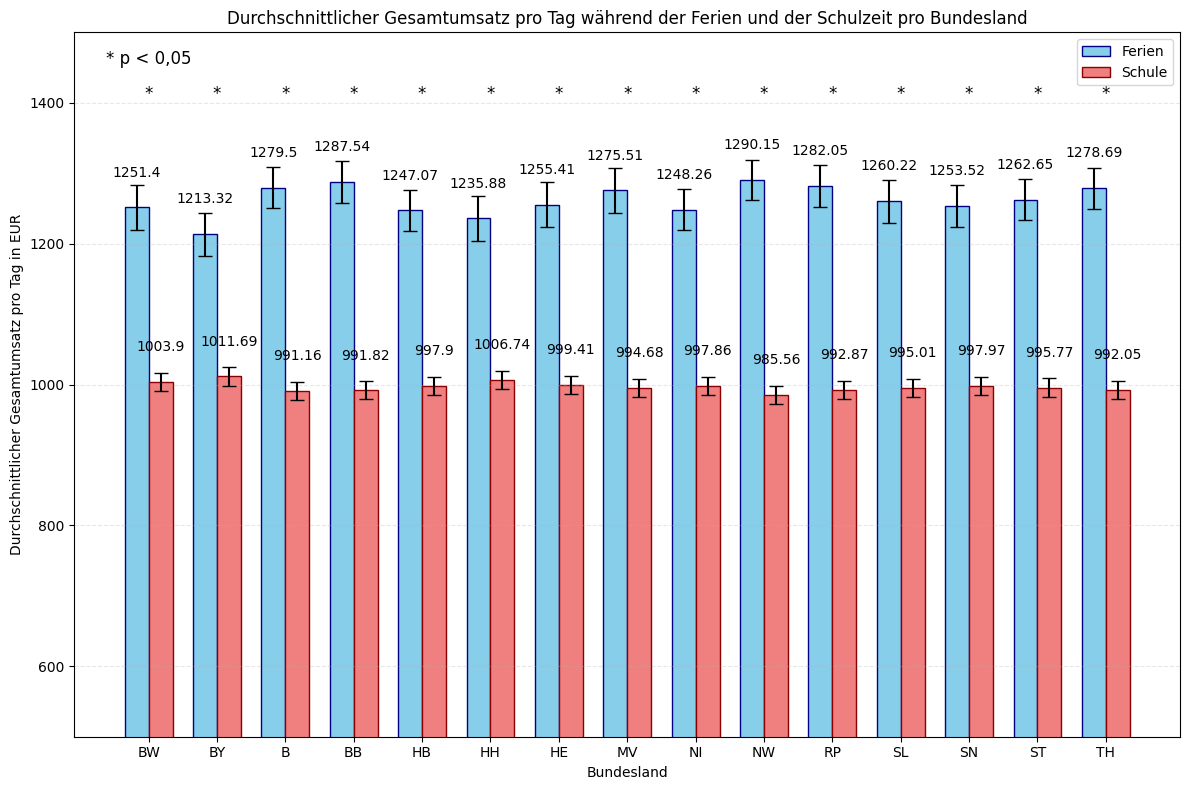

In [7]:
# Mittelwerte der Umsätze während der Ferien und der Schulzeit für jedes Bundesland
mean_ferien = [mean_BW_ferien, mean_BY_ferien, mean_B_ferien, mean_BB_ferien, mean_HB_ferien, mean_HH_ferien, mean_HE_ferien, 
               mean_MV_ferien, mean_NI_ferien, mean_NW_ferien, mean_RP_ferien, mean_SL_ferien, mean_SN_ferien, mean_ST_ferien, mean_TH_ferien]
mean_schule = [mean_BW_schule, mean_BY_schule, mean_B_schule, mean_BB_schule, mean_HB_schule, mean_HH_schule, mean_HE_schule, mean_MV_schule, 
               mean_NI_schule, mean_NW_schule, mean_RP_schule, mean_SL_schule, mean_SN_schule, mean_ST_schule, mean_TH_schule]

# Bundesländer
bundeslaender = ['BW', 'BY', 'B', 'BB', 'HB', 'HH', 'HE', 'MV', 'NI', 'NW', 'RP', 'SL', 'SN', 'ST', 'TH']

# Balkendiagramm erstellen
x = np.arange(len(bundeslaender))  # die Label-Positionen
width = 0.35  # die Breite der Balken

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, mean_ferien, width, label='Ferien', color='skyblue', edgecolor='navy', capsize=7)
rects2 = ax.bar(x + width/2, mean_schule, width, label='Schule', color='lightcoral', edgecolor='darkred', capsize=7)

#Konfidenzintervalle mit 95% berechnen
#Baden-Württemberg (BW)
ci_BW_ferien = stats.norm.interval(0.95, loc=mean_BW_ferien, scale=std_BW_ferien/np.sqrt(n_BW_ferien))
ci_BW_schule = stats.norm.interval(0.95, loc=mean_BW_schule, scale=std_BW_schule/np.sqrt(n_BW_schule))
#Bayern (BY)
ci_BY_ferien = stats.norm.interval(0.95, loc=mean_BY_ferien, scale=std_BY_ferien/np.sqrt(n_BY_ferien))
ci_BY_schule = stats.norm.interval(0.95, loc=mean_BY_schule, scale=std_BY_schule/np.sqrt(n_BY_schule))
#Berlin (B)
ci_B_ferien = stats.norm.interval(0.95, loc=mean_B_ferien, scale=std_B_ferien/np.sqrt(n_B_ferien))
ci_B_schule = stats.norm.interval(0.95, loc=mean_B_schule, scale=std_B_schule/np.sqrt(n_B_schule))
#Brandenburg (BB)
ci_BB_ferien = stats.norm.interval(0.95, loc=mean_BB_ferien, scale=std_BB_ferien/np.sqrt(n_BB_ferien))
ci_BB_schule = stats.norm.interval(0.95, loc=mean_BB_schule, scale=std_BB_schule/np.sqrt(n_BB_schule))
#Bremen (HB)
ci_HB_ferien = stats.norm.interval(0.95, loc=mean_HB_ferien, scale=std_HB_ferien/np.sqrt(n_HB_ferien))
ci_HB_schule = stats.norm.interval(0.95, loc=mean_HB_schule, scale=std_HB_schule/np.sqrt(n_HB_schule))
#Hamburg (HH)
ci_HH_ferien = stats.norm.interval(0.95, loc=mean_HH_ferien, scale=std_HH_ferien/np.sqrt(n_HH_ferien))
ci_HH_schule = stats.norm.interval(0.95, loc=mean_HH_schule, scale=std_HH_schule/np.sqrt(n_HH_schule))
#Hessen (HE)
ci_HE_ferien = stats.norm.interval(0.95, loc=mean_HE_ferien, scale=std_HE_ferien/np.sqrt(n_HE_ferien))
ci_HE_schule = stats.norm.interval(0.95, loc=mean_HE_schule, scale=std_HE_schule/np.sqrt(n_HE_schule))
#Mecklenburg-Vorpommern (MV)
ci_MV_ferien = stats.norm.interval(0.95, loc=mean_MV_ferien, scale=std_MV_ferien/np.sqrt(n_MV_ferien))
ci_MV_schule = stats.norm.interval(0.95, loc=mean_MV_schule, scale=std_MV_schule/np.sqrt(n_MV_schule))
#Niedersachsen (NI)
ci_NI_ferien = stats.norm.interval(0.95, loc=mean_NI_ferien, scale=std_NI_ferien/np.sqrt(n_NI_ferien))
ci_NI_schule = stats.norm.interval(0.95, loc=mean_NI_schule, scale=std_NI_schule/np.sqrt(n_NI_schule))
#Nordrhein-Westfalen (NW)
ci_NW_ferien = stats.norm.interval(0.95, loc=mean_NW_ferien, scale=std_NW_ferien/np.sqrt(n_NW_ferien))
ci_NW_schule = stats.norm.interval(0.95, loc=mean_NW_schule, scale=std_NW_schule/np.sqrt(n_NW_schule))
#Rheinland-Pfalz (RP)
ci_RP_ferien = stats.norm.interval(0.95, loc=mean_RP_ferien, scale=std_RP_ferien/np.sqrt(n_RP_ferien))
ci_RP_schule = stats.norm.interval(0.95, loc=mean_RP_schule, scale=std_RP_schule/np.sqrt(n_RP_schule))
#Saarland (SL)
ci_SL_ferien = stats.norm.interval(0.95, loc=mean_SL_ferien, scale=std_SL_ferien/np.sqrt(n_SL_ferien))
ci_SL_schule = stats.norm.interval(0.95, loc=mean_SL_schule, scale=std_SL_schule/np.sqrt(n_SL_schule))
#Sachsen (SN)
ci_SN_ferien = stats.norm.interval(0.95, loc=mean_SN_ferien, scale=std_SN_ferien/np.sqrt(n_SN_ferien))
ci_SN_schule = stats.norm.interval(0.95, loc=mean_SN_schule, scale=std_SN_schule/np.sqrt(n_SN_schule))
#Sachsen-Anhalt (ST)
ci_ST_ferien = stats.norm.interval(0.95, loc=mean_ST_ferien, scale=std_ST_ferien/np.sqrt(n_ST_ferien))
ci_ST_schule = stats.norm.interval(0.95, loc=mean_ST_schule, scale=std_ST_schule/np.sqrt(n_ST_schule))
#Schleswig-Holstein (SH)
ci_SH_ferien = stats.norm.interval(0.95, loc=mean_SH_ferien, scale=std_SH_ferien/np.sqrt(n_SH_ferien))
ci_SH_schule = stats.norm.interval(0.95, loc=mean_SH_schule, scale=std_SH_schule/np.sqrt(n_SH_schule))
#Thüringen (TH)
ci_TH_ferien = stats.norm.interval(0.95, loc=mean_TH_ferien, scale=std_TH_ferien/np.sqrt(n_TH_ferien))
ci_TH_schule = stats.norm.interval(0.95, loc=mean_TH_schule, scale=std_TH_schule/np.sqrt(n_TH_schule))

# Fehlerbalken mit Grenzen der Konfidenzintervalle hinzufügen
yerr_ferien = np.array([[mean_ferien[i] - ci[0], ci[1] - mean_ferien[i]] for i, ci in enumerate([ci_BW_ferien, ci_BY_ferien, ci_B_ferien, ci_BB_ferien, ci_HB_ferien, ci_HH_ferien, ci_HE_ferien, ci_MV_ferien, ci_NI_ferien, ci_NW_ferien, ci_RP_ferien, ci_SL_ferien, ci_SN_ferien, ci_ST_ferien, ci_TH_ferien])]).T
yerr_schule = np.array([[mean_schule[i] - ci[0], ci[1] - mean_schule[i]] for i, ci in enumerate([ci_BW_schule, ci_BY_schule, ci_B_schule, ci_BB_schule, ci_HB_schule, ci_HH_schule, ci_HE_schule, ci_MV_schule, ci_NI_schule, ci_NW_schule, ci_RP_schule, ci_SL_schule, ci_SN_schule, ci_ST_schule, ci_TH_schule])]).T

ax.errorbar(x - width/2, mean_ferien, yerr=yerr_ferien, fmt='none', ecolor='black', capsize=5)
ax.errorbar(x + width/2, mean_schule, yerr=yerr_schule, fmt='none', ecolor='black', capsize=5)
     
print('Fehler Ferien:', yerr_ferien)
print('Fehler Schule:', yerr_schule)

#Signifikanz mit Sternchen über den Balken anzeigen
def add_significance(p, x, y):
    if p < alpha:
        ax.text(x, y, '*', ha='center', va='bottom', fontsize=12)
        
#Signifikanz Baden-Württemberg (BW) bis Thüringen (TH) hinzufügen
add_significance(p_BW, 0, 1400)
add_significance(p_BY, 1, 1400)
add_significance(p_B, 2, 1400)
add_significance(p_BB, 3, 1400)
add_significance(p_HB, 4, 1400)
add_significance(p_HH, 5, 1400)
add_significance(p_HE, 6, 1400)
add_significance(p_MV, 7, 1400)
add_significance(p_NI, 8, 1400)
add_significance(p_NW, 9, 1400)
add_significance(p_RP, 10, 1400)
add_significance(p_SL, 11, 1400)
add_significance(p_SN, 12, 1400)
add_significance(p_ST, 13, 1400)
add_significance(p_TH, 14, 1400)

#Legende zu den Sternchen oben links im Diagrammbereich hinzufügen
ax.text(0, 1450, '* p < 0,05', ha='center', va='bottom', fontsize=12)

# Labels, Titel und Legende hinzufügen
ax.set_xlabel('Bundesland')
ax.set_ylabel('Durchschnittlicher Gesamtumsatz pro Tag in EUR')
ax.set_title('Durchschnittlicher Gesamtumsatz pro Tag während der Ferien und der Schulzeit pro Bundesland')
ax.set_xticks(x)
ax.set_xticklabels(bundeslaender)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Y-Achse bei 500 starten
plt.ylim(bottom=500)

#y-achse bei 1500 enden
plt.ylim(top=1500)

# Balken mit Werten annotieren
def autolabel(rects):
    """Fügt die Werte über den Balken hinzu."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 20),  # 20 Punkte vertikaler Versatz
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

NRW-Betrachtung als einzelne Variable

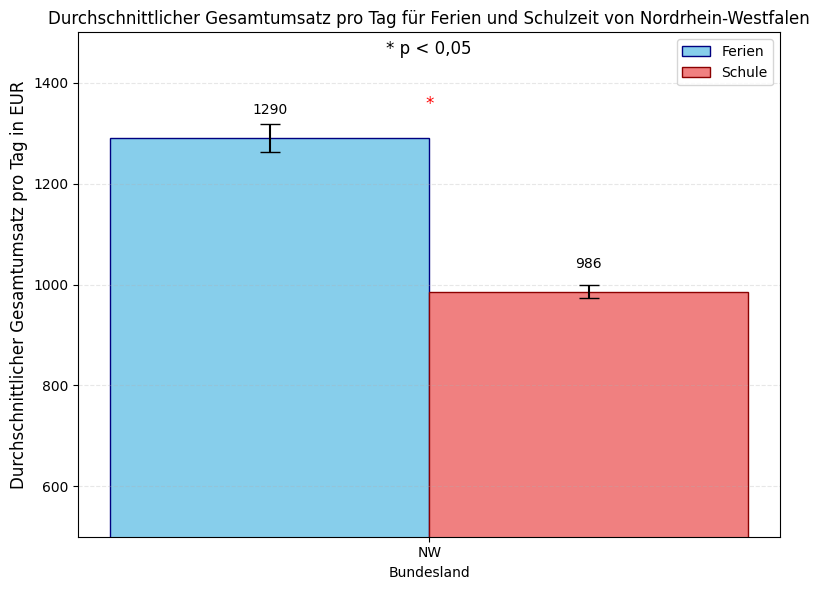

In [8]:
# Mittelwerte der Umsätze während der Ferien und der Schulzeit für Nordrhein-Westfalen (NW)
mean_ferien_NW = mean_NW_ferien
mean_schule_NW = mean_NW_schule

#Werte runden
mean_ferien_NW = round(mean_ferien_NW, 0)
mean_schule_NW = round(mean_schule_NW, 0)

#in  int umwandeln
mean_ferien_NW = int(mean_ferien_NW)
mean_schule_NW = int(mean_schule_NW)


# Konfidenzintervalle für Nordrhein-Westfalen (NW)
ci_NW_ferien = stats.norm.interval(0.95, loc=mean_NW_ferien, scale=std_NW_ferien/np.sqrt(n_NW_ferien))
ci_NW_schule = stats.norm.interval(0.95, loc=mean_NW_schule, scale=std_NW_schule/np.sqrt(n_NW_schule))

# Fehlerbalken berechnen
yerr_ferien_NW = [[mean_ferien_NW - ci_NW_ferien[0]], [ci_NW_ferien[1] - mean_ferien_NW]]
yerr_schule_NW = [[mean_schule_NW - ci_NW_schule[0]], [ci_NW_schule[1] - mean_schule_NW]]

# Balkendiagramm erstellen
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(0 - width/2, mean_ferien_NW, width, label='Ferien', color='skyblue', edgecolor='navy', capsize=7, yerr=yerr_ferien_NW)
rects2 = ax.bar(0 + width/2, mean_schule_NW, width, label='Schule', color='lightcoral', edgecolor='darkred', capsize=7, yerr=yerr_schule_NW)


# Signifikanz hinzufügen
if p_NW < alpha:
    ax.text(0, max(mean_ferien_NW, mean_schule_NW) + 50, '*', ha='center', va='bottom', fontsize=12, color='red')
    
# Legende zur Signifikanz hinzufügen
ax.text(0, 1450, '* p < 0,05', ha='center', va='bottom', fontsize=12)

# Labels, Titel und Legende hinzufügen
ax.set_xlabel('Bundesland')
ax.set_ylabel('Durchschnittlicher Gesamtumsatz pro Tag in EUR', fontsize=12)
ax.set_title('Durchschnittlicher Gesamtumsatz pro Tag für Ferien und Schulzeit von Nordrhein-Westfalen', fontsize=12)
ax.set_xticks([0])
ax.set_xticklabels(['NW'])
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Y-Achse bei 500 starten
plt.ylim(bottom=500)

#y-achse bei 1500 enden
plt.ylim(top=1500)

# Balken mit Werten annotieren
def autolabel(rects):
    """Fügt die Werte über den Balken hinzu."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 15),  # 15 Punkte vertikaler Versatz
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

NW Umsätze nach Warengruppe

Umsatz Ferien: Warengruppe
1    143.465886
2    512.954646
3    230.726570
4     84.376161
5    318.948834
6     49.633719
Name: Umsatz, dtype: float64
Umsatz Schule: Warengruppe
1    115.133364
2    366.189999
3    141.190779
4     89.080954
5    262.939412
6     69.901235
Name: Umsatz, dtype: float64
Standardabweichung Ferien: Warengruppe
1     47.842250
2    131.145139
3     80.987008
4     27.379963
5    162.416689
6     30.533599
Name: Umsatz, dtype: float64
Standardabweichung Schule: Warengruppe
1     34.760110
2    122.243451
3     58.767658
4     37.410244
5     60.950675
6     31.797264
Name: Umsatz, dtype: float64
Anzahl Ferien: Warengruppe
1    450
2    450
3    450
4    423
5    450
6     43
Name: Umsatz, dtype: int64
Anzahl Schule: Warengruppe
1    1369
2    1369
3    1369
4    1343
5    1369
6     249
Name: Umsatz, dtype: int64


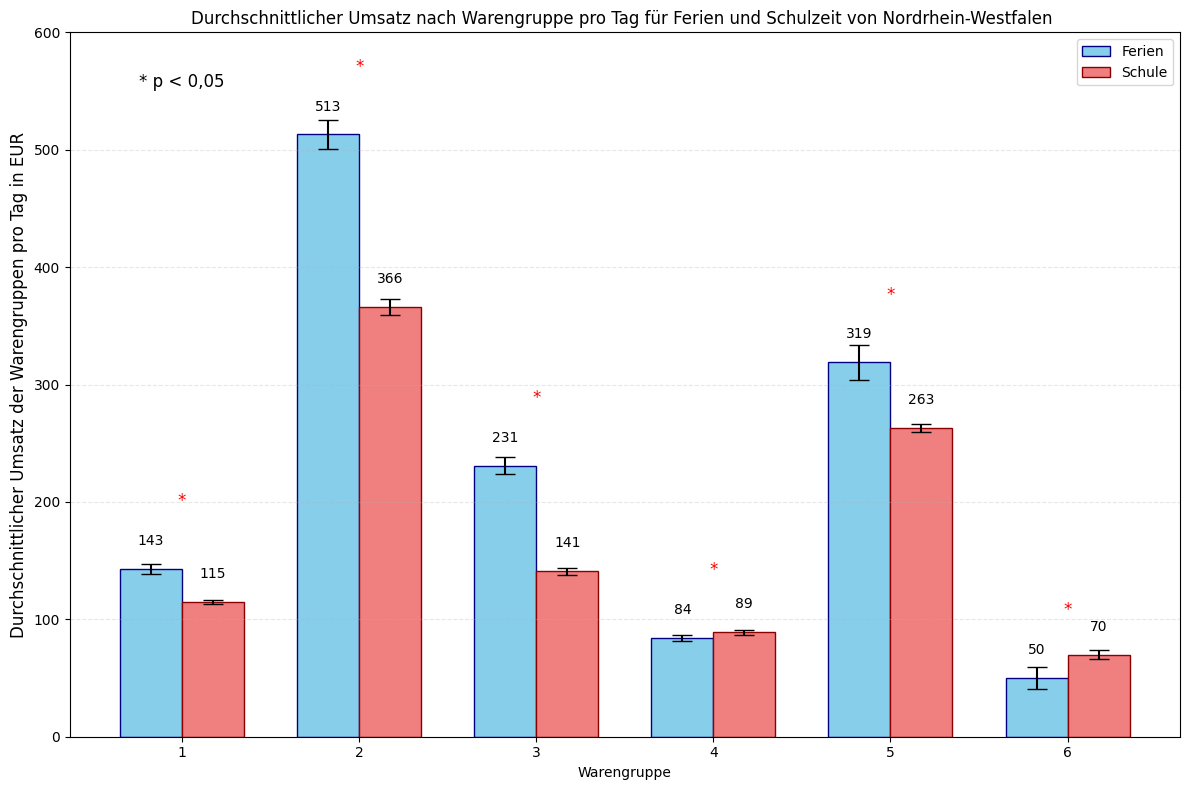

Warengruppe: Index([1, 2, 3, 4, 5, 6], dtype='int64', name='Warengruppe')
p-Werte: [np.float64(4.719376848340667e-40), np.float64(5.473112565482545e-93), np.float64(9.684052956335923e-122), np.float64(0.016842953207116807), np.float64(7.299174457504701e-26), np.float64(0.00012849760483489898)]


In [9]:
# Merge df1 and df2 to create df
df = pd.merge(df1, df2, on='Datum')

# alpha-Wert
alpha = 0.05

# Daten nach Ferien und Schule filtern
df_NW_ferien = df[df['NW'] == 1]
df_NW_schule = df[df['NW'] == 0]

# Umsatz nach Warengruppe für Ferien und Schule gruppieren
umsatz_NW_ferien = df_NW_ferien.groupby('Warengruppe')['Umsatz'].mean()
umsatz_NW_schule = df_NW_schule.groupby('Warengruppe')['Umsatz'].mean()

# Standardabweichung je Warengruppe berechnen
std_NW_ferien = df_NW_ferien.groupby('Warengruppe')['Umsatz'].std()
std_NW_schule = df_NW_schule.groupby('Warengruppe')['Umsatz'].std()

# Anzahl der Werte je Warengruppe berechnen
n_NW_ferien = df_NW_ferien.groupby('Warengruppe')['Umsatz'].count()
n_NW_schule = df_NW_schule.groupby('Warengruppe')['Umsatz'].count()

# Umsatz nach Warengruppe für Ferien und Schule anzeigen
print('Umsatz Ferien:', umsatz_NW_ferien)
print('Umsatz Schule:', umsatz_NW_schule)

# Standardabweichung je Warengruppe anzeigen
print('Standardabweichung Ferien:', std_NW_ferien)
print('Standardabweichung Schule:', std_NW_schule)

# Anzahl der Werte je Warengruppe anzeigen
print('Anzahl Ferien:', n_NW_ferien)
print('Anzahl Schule:', n_NW_schule)

# Umsätze runden
umsatz_NW_ferien = umsatz_NW_ferien.round(0).astype(int)
umsatz_NW_schule = umsatz_NW_schule.round(0).astype(int)

# Warengruppen
warengruppen = umsatz_NW_ferien.index

# Konfidenzintervalle für Ferien und Schule berechnen
ci_NW_ferien = [stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n)) 
                for mean, std, n in zip(umsatz_NW_ferien, std_NW_ferien, n_NW_ferien)]
ci_NW_schule = [stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n)) 
                for mean, std, n in zip(umsatz_NW_schule, std_NW_schule, n_NW_schule)]

# Fehlerbalken berechnen
yerr_NW_ferien = np.array([[mean - ci[0], ci[1] - mean] for mean, ci in zip(umsatz_NW_ferien, ci_NW_ferien)]).T     
yerr_NW_schule = np.array([[mean - ci[0], ci[1] - mean] for mean, ci in zip(umsatz_NW_schule, ci_NW_schule)]).T

# Balkendiagramm erstellen
x = np.arange(len(warengruppen))  # die Label-Positionen
width = 0.35  # die Breite der Balken

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, umsatz_NW_ferien, width, label='Ferien', color='skyblue', edgecolor='navy', capsize=7, yerr=yerr_NW_ferien)
rects2 = ax.bar(x + width/2, umsatz_NW_schule, width, label='Schule', color='lightcoral', edgecolor='darkred', capsize=7, yerr=yerr_NW_schule)

# t-Test durchführen für jede Warengruppe
ttest_warengruppen = [stats.ttest_ind(df_NW_ferien[df_NW_ferien['Warengruppe'] == wg]['Umsatz'], 
                                      df_NW_schule[df_NW_schule['Warengruppe'] == wg]['Umsatz']) 
                      for wg in warengruppen]

# p-Werte für jede Warengruppe
p_warengruppen = [t[1] for t in ttest_warengruppen]

# Signifikanz mit Sternchen über den Balken anzeigen
def add_significance(p, x, y):
    if p < alpha:
        ax.text(x, y, '*', ha='center', va='bottom', fontsize=12, color='red')

# Signifikanz hinzufügen
for i, p in enumerate(p_warengruppen):
    # `warengruppen[i]` verwendet den richtigen Index aus den Warengruppen
    warengruppe = warengruppen[i]
    y_value = umsatz_NW_ferien[warengruppe]  # Zugriff auf den Wert für die Warengruppe
    add_significance(p, i, y_value + 50)

# Legende zu den Sternchen oben links im Diagrammbereich hinzufügen
ax.text(0, 550, '* p < 0,05', ha='center', va='bottom', fontsize=12)


# Labels, Titel und Legende hinzufügen
ax.set_xlabel('Warengruppe')
ax.set_ylabel('Durchschnittlicher Umsatz der Warengruppen pro Tag in EUR', fontsize=12)
ax.set_title('Durchschnittlicher Umsatz nach Warengruppe pro Tag für Ferien und Schulzeit von Nordrhein-Westfalen ', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(warengruppen)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

# y-Achse bei 600 enden
plt.ylim(top=600)

# Balken mit Werten annotieren
def autolabel(rects):
    """Fügt die Werte über den Balken hinzu."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 15),  # 15 Punkte vertikaler Versatz
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# dataframe anzeigen
df.head()


#p-Werte für jede Warengruppe ausgeben
print('Warengruppe:', warengruppen)
print('p-Werte:', p_warengruppen)